<a href="https://colab.research.google.com/github/chrislee973/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module3-dimensionality-reduction/LS_DS_133_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

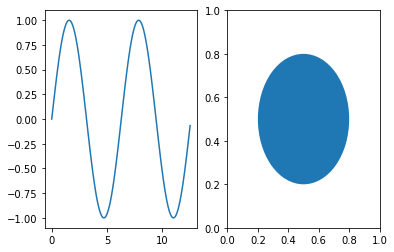

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

x = np.arange(0,4*np.pi,0.1)   # start,stop,step
y = np.sin(x)

ax1.plot(x,y)

draw_circle = plt.Circle((0.5, 0.5), 0.3)
ax2.add_artist(draw_circle)

plt.show()


## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because that means there there are inputs that map to two outputs, which violates a property of functions. For a function, each input must map to a single output. 

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 is the only relation that is a function because each input maps to a single unique output.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

The dimensionality of the domain is 3 and the dimensionality of the range is dimension 2.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.


No, it's not possible because there aren't enough basis vectors in the lower dimensional space to form a transformation matrix that will transform a vector into a higher-dimensional space.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

p([1,0]) = [1, -1]

p([0,1]) = [3, 2]

Tranformation matrix: [[1,3],
                      [-1,2]]

p([1,0,0]) = [4,-1,5]

p([0,1,0]) = [1,2,1]

p([0,0,1]) = [2,3,-2]

Transformation matrix: [[4,1,2],
                        [-1,2,3],
                        [5,1,-2]]

In [ ]:
A = np.array([[1,3],
              [-1,2]])

B= np.array([[4,1,2],
            [-1,2,3],
            [5,1,-2]])

unit_vector_2 = np.array([[1,0], [0,1]])
unit_vector_3 = np.array([[1,0,0], [0,1,0], [0,0,1]])

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [ ]:
print("\n2-d space basis vectors transformed:\n", np.dot(A,unit_vector_2))

print("\n3-d space basis vectors transformed:\n", np.dot(B,unit_vector_3))


2-d space basis vectors transformed:
 [[ 1  3]
 [-1  2]]

3-d space basis vectors transformed:
 [[ 4  1  2]
 [-1  2  3]
 [ 5  1 -2]]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are the vectors which don't change direction after a particular linear transformation. The eigenvalue is the value in which the eigenvector's magnitude was scaled after the transformation.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

The higher the dimension, the more difficult it is to search through the vector space and once a high enough dimension is reached, the data points become virtually equidistant from one another, which could make it difficult for clustering algorithms. Additionally, there's an added risk of overfitting when the number of features outnumber the rows.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

You should have 5 times as many observations as parameters.

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [ ]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [ ]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL                 object
AGE1                     int64
METRO3                  object
REGION                  object
LMED                     int64
FMR                      int64
L30                      int64
L50                      int64
L80                      int64
IPOV                     int64
BEDRMS                   int64
BUILT                    int64
STATUS                  object
TYPE                     int64
VALUE                    int64
VACANCY                  int64
TENURE                  object
NUNITS                   int64
ROOMS                    int64
WEIGHT                 float64
PER                      int64
ZINC2                    int64
ZADEQ                   object
ZSMHC                    int64
STRUCTURETYPE            int64
OWNRENT                 object
UTILITY                float64
OTHERCOST              float64
COST06                 float64
COST12                 float64
                        ...   
COSTMedRELAMICAT         int64
COSTMedR

In [ ]:
# check for null values
national.isnull().sum().any()

False

In [ ]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [ ]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL            category
AGE1                  int64
METRO3             category
REGION             category
LMED                  int64
                     ...   
FMTINCRELAMICAT    category
FMTASSISTED        category
FMTBURDEN          category
FMTREGION          category
FMTSTATUS          category
Length: 99, dtype: object

In [ ]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0,0


In [ ]:
# Now we only ahve numeric columns (ints and floats)
national_processed.dtypes

In [ ]:
### Your Code Here


from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

scaler = StandardScaler()
pca = PCA(2)

Z = scaler.fit_transform(national_processed)

pca.fit(Z)
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data
B = pca.transform(Z)

print(f"\nProjected data:\n {B}")



 Eigenvectors: 
 [[-0.01762294  0.04564172  0.00224448 -0.0056805   0.04142715  0.08969161
   0.06498292  0.0649871   0.06422065  0.06147403  0.08585244  0.01801879
  -0.05896537 -0.01528452  0.13234213 -0.05711476 -0.03969967 -0.02559715
   0.09915137  0.02420272  0.06848524  0.10804133  0.02549375  0.12591589
  -0.0686994  -0.09686185  0.09495694  0.06829523  0.13890808  0.13843111
   0.13897851  0.138511    0.0905027  -0.07741872  0.04142715  0.06498292
   0.0649871   0.06422065  0.07923954  0.0921104   0.09210336  0.09490276
   0.08739559  0.00091387  0.10149966  0.10199758  0.1018149   0.08553625
   0.09217413  0.0781451   0.13215061  0.14670343  0.1335704   0.09089986
   0.12974258  0.12772056  0.13365417  0.14824806  0.13368685  0.0902927
   0.13209618  0.12802126  0.13470573  0.1470892   0.13320525  0.08919073
   0.13411974  0.12560459  0.13025193  0.14427022  0.13314257  0.09127039
   0.1269716   0.12604755  0.02549375 -0.02868194  0.02198791 -0.06878637
   0.08502306 -0.0968

In [ ]:
proj_df = pd.DataFrame({'x': B[:,0], 'y': B[:,1]})
proj_df

,x,y
0,-2.576570,-1.376127
1,2.040643,-0.988061
2,1.215270,0.370168
3,2.821837,1.723711
4,-1.570106,-0.878362
...,...,...
64530,-3.052490,0.413172
64531,-6.533380,-5.274883
64532,1.831628,-2.955702
64533,-5.025145,-2.528578


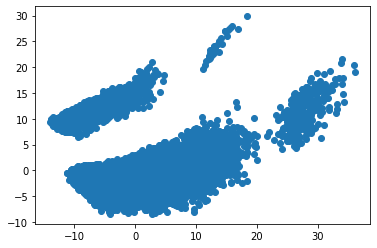

In [ ]:
plt.scatter(x = proj_df['x'], y = proj_df['y'])

In [ ]:
tt = np.array([[-2,1], [0,1], [2,1], [-2,0], [0,0], [2,0], [-2,-1], [0,-1], [2,-1]])

np.cov(tt)

array([[ 4.5,  1.5, -1.5,  3. ,  0. , -3. ,  1.5, -1.5, -4.5],
       [ 1.5,  0.5, -0.5,  1. ,  0. , -1. ,  0.5, -0.5, -1.5],
       [-1.5, -0.5,  0.5, -1. ,  0. ,  1. , -0.5,  0.5,  1.5],
       [ 3. ,  1. , -1. ,  2. ,  0. , -2. ,  1. , -1. , -3. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-3. , -1. ,  1. , -2. ,  0. ,  2. , -1. ,  1. ,  3. ],
       [ 1.5,  0.5, -0.5,  1. ,  0. , -1. ,  0.5, -0.5, -1.5],
       [-1.5, -0.5,  0.5, -1. ,  0. ,  1. , -0.5,  0.5,  1.5],
       [-4.5, -1.5,  1.5, -3. ,  0. ,  3. , -1.5,  1.5,  4.5]])

In [ ]:
tt

array([[-2,  1],
       [ 0,  1],
       [ 2,  1],
       [-2,  0],
       [ 0,  0],
       [ 2,  0],
       [-2, -1],
       [ 0, -1],
       [ 2, -1]])

In [ ]:
tt.T

array([[-2,  0,  2, -2,  0,  2, -2,  0,  2],
       [ 1,  1,  1,  0,  0,  0, -1, -1, -1]])

In [ ]:
tt_x = tt[:,0]
tt_y = tt[:,1]

np.cov(tt_x,tt_y)

array([[3.  , 0.  ],
       [0.  , 0.75]])

In [ ]:
np.cov(tt.T)

array([[3.  , 0.  ],
       [0.  , 0.75]])

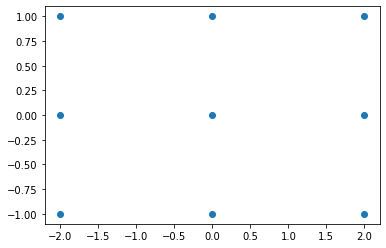

In [ ]:
plt.scatter(x = tt_x, y=tt_y)

# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)

In [ ]:
# Principal Component Analysis
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# define a matrix
X = array([[1, 2], [3, 4], [5, 6]])
print("Data: \n", X)
# Standardize the Data
# Instantiate a Standard Scaler object
scaler = StandardScaler()
# Use the object to fit_transform our data
Z = scaler.fit_transform(X)
print("\n Standardized Data: \n", Z)
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(Z)
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data
B = pca.transform(Z)
print("\n Projected Data: \n", B)

Data: 
 [[1 2]
 [3 4]
 [5 6]]

 Standardized Data: 
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]

 Eigenvectors: 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

 Eigenvalues: 
 [3.00000000e+00 1.23259516e-32]

 Projected Data: 
 [[-1.73205081e+00  7.75139526e-18]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.73205081e+00 -7.75139526e-18]]


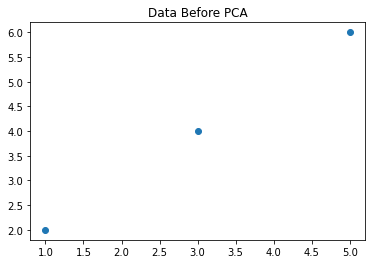

In [ ]:

x = [1,3,5] 
y = [2,4,6]
data = {"x": x, "y": y}

df = pd.DataFrame(data)

plt.scatter(df['x'], df['y'])
plt.title("Data Before PCA")
plt.show()



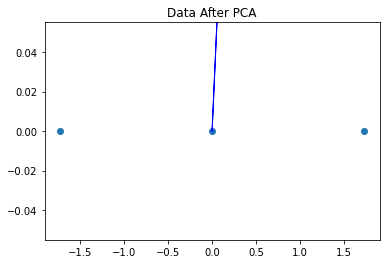

In [ ]:
p_x = B[:, 0]
p_y = B[:, 1].round(2)

data = {"p_x": p_x, "p_y": p_y}

df = pd.DataFrame(data)

plt.scatter(df['p_x'], df['p_y'])

#plot eigenvector arrows
plt.arrow(0,0, 0.70710678 , 0.70710678, color='b')

plt.title("Data After PCA")
plt.show()

The above chart is wrong because the x-axis on which the coords are projected is the eigenvector with the points already projected onto there. The coords are not just the coords of the dataset, they are the coords of the points that are already projected onto principal component 1.

I'm just spitballing ideas to help me grapple with the idea of PCA in my head, but when performing a linear regression is the best fit line basically the PC1 eigenvector for the data?

In [94]:

from numpy import array
from numpy import mean
from numpy import std
from numpy import cov
from numpy.linalg import eig

# define a matrix (we'll pretend that we've already separated our X and Y matrices)
X = array([[1, 2], [3, 4], [5, 6]])
print("Data:\n", X)
# calculate the mean of each column
means = mean(X.T, axis=1)
print("\n Means: \n", means)
# center columns by subtracting column means
centered_data = X - means
print("\n Centered Data: \n", centered_data)
# calculate the standard deviation of each column
std_devs = std(X.T, axis=1)
print('\n Standard Deviations: \n', std_devs)
# complete the standardization by dividing by std_dev
standardized_data = centered_data / std_devs
print("\n Standardized Data: \n", standardized_data)
# calculate covariance matrix of our standardized matrix
covariance_matrix = cov(standardized_data.T)
print("\n Covariance Matrix: \n", covariance_matrix)
# eigendecomposition of covariance matrix
values, vectors = eig(covariance_matrix)
print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)
# project data 
P = vectors.T.dot(standardized_data.T)
print("\n Projected Data: \n", P.T)

Data:
 [[1 2]
 [3 4]
 [5 6]]

 Means: 
 [3. 4.]

 Centered Data: 
 [[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]

 Standard Deviations: 
 [1.63299316 1.63299316]

 Standardized Data: 
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]

 Covariance Matrix: 
 [[1.5 1.5]
 [1.5 1.5]]

 Eigenvectors: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

 Eigenvalues: 
 [3. 0.]

 Projected Data: 
 [[-1.73205081e+00 -7.75139526e-18]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.73205081e+00  7.75139526e-18]]


In [ ]:

from numpy import array
from numpy import mean
from numpy import std
from numpy import cov
from numpy.linalg import eig

# define a matrix (we'll pretend that we've already separated our X and Y matrices)
X = array([[1, 2], [3, 4], [5, 6]])
print("Data: ", X)
# calculate the mean of each column
means = mean(X.T, axis=1)
print("\n Means: \n", means)
# center columns by subtracting column means
centered_data = X - means
print("\n Centered Data: \n", centered_data)
# calculate the standard deviation of each column
std_devs = std(X.T, axis=1)
print('\n Standard Deviations: \n', std_devs)
# complete the standardization by dividing by std_dev
standardized_data = centered_data / std_devs
print("\n Standardized Data: \n", standardized_data)
# calculate covariance matrix of our standardized matrix
covariance_matrix = cov(standardized_data.T)
print("\n Covariance Matrix: \n", covariance_matrix)
# eigendecomposition of covariance matrix
values, vectors = eig(covariance_matrix)
print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)
# project data
P = np.dot(standardized_data, vectors.T)
print("\n Projected Data: \n", P.T)

Data:  [[1 2]
 [3 4]
 [5 6]]

 Means: 
 [3. 4.]

 Centered Data: 
 [[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]

 Standard Deviations: 
 [1.63299316 1.63299316]

 Standardized Data: 
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]

 Covariance Matrix: 
 [[1.5 1.5]
 [1.5 1.5]]

 Eigenvectors: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

 Eigenvalues: 
 [3. 0.]

 Projected Data: 
 [[ 7.75139526e-18  0.00000000e+00 -7.75139526e-18]
 [-1.73205081e+00  0.00000000e+00  1.73205081e+00]]


In [ ]:
np.dot(standardized_data.T, standardized_data)

array([[3., 3.],
       [3., 3.]])

In [ ]:
yy = np.array([[-1.22474487 ,-1.22474487],
 [ 0.     ,     0.        ],
 [ 1.22474487 , 1.22474487]])

yy

array([[-1.22474487, -1.22474487],
       [ 0.        ,  0.        ],
       [ 1.22474487,  1.22474487]])